In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv("houses1000.csv")

In [144]:
# data.to_parquet("houses1000.parquet")

In [145]:
needed_columns = ['timestamp', 'maid', 'hh_id','iiqid', 'partner_id', 'ip', 'iscellip',
       'cellispid', 'domain','is_house_ip_or_source_ip', 'brand', 'model', 'os', 'osversion',
       'browser', 'advertisedbrowser', 'browserversion', 'type', 'is_best_ip']
unnecessary_columns = [c for c in data.columns if c not in needed_columns]

In [146]:
unnecessary_columns

['filename',
 'profile_house',
 'first_cookie',
 'a',
 'b',
 'c',
 'uahash',
 'gpslat',
 'gpslon',
 'd',
 'e',
 'f',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'is_unreachable_first_cookie',
 'is_original_ip',
 'real_maid',
 'battery_level',
 'height',
 'width',
 'free_disk_space',
 'total_disk_space',
 'hardware',
 'publisher',
 'flavor']

In [147]:
data.drop(unnecessary_columns, axis=1, inplace=True)

In [148]:
data.head()

,timestamp,iiqid,hh_id,maid,partner_id,ip,iscellip,cellispid,domain,is_house_ip_or_source_ip,brand,model,os,osversion,browser,advertisedbrowser,browserversion,type,is_best_ip
0,1672916867869,EUuUmjWsqL,000eT0aAVu,4,14,26343170,False,483294422,-1478686014,False,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
1,1672916867864,EUuUmjWsqL,000eT0aAVu,3,14,26343170,False,483294422,-1478686014,False,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
2,1671513889036,EUuUmjWsqL,000eT0aAVu,4,14,2092771755,False,483294422,326157497,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
3,1671513205899,EUuUmjWsqL,000eT0aAVu,4,14,2092771755,False,483294422,-1699376052,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False
4,1671513205881,EUuUmjWsqL,000eT0aAVu,3,14,2092771755,False,483294422,-1699376052,True,apple,iphone,ios,14.8.1,safari,iOS WebView,14.8.1,smartphone,False


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721513 entries, 0 to 721512
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   timestamp                 721513 non-null  int64 
 1   iiqid                     638472 non-null  object
 2   hh_id                     721513 non-null  object
 3   maid                      721513 non-null  int64 
 4   partner_id                721513 non-null  int64 
 5   ip                        721513 non-null  int64 
 6   iscellip                  721513 non-null  bool  
 7   cellispid                 721513 non-null  int64 
 8   domain                    721513 non-null  int64 
 9   is_house_ip_or_source_ip  721513 non-null  bool  
 10  brand                     721157 non-null  object
 11  model                     718081 non-null  object
 12  os                        721142 non-null  object
 13  osversion                 720664 non-null  object
 14  brow

In [161]:
third_parties = data[(data['maid'] == 4) | (data['maid'] == 7)]

In [162]:
third_parties['hh_id'].nunique()

990

In [163]:
third_parties['time'] = pd.to_datetime(third_parties['timestamp'], unit='ms')
# third_parties['time'] = third_parties['timestamp'].apply(lambda t: pd.to_datetime(t, unit='ms'))

/var/folders/nw/8w_76z_n6fz418hmsps2_rq40000gn/T/ipykernel_49304/3734518910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_parties['time'] = pd.to_datetime(third_parties['timestamp'], unit='ms')


In [164]:
len(third_parties.dropna())

373686

In [165]:
third_parties = third_parties.dropna()

In [174]:
# third_parties[["major", "minor", "patch", "subpatch"]] = third_parties['browserversion'].apply(lambda x: 
                                                                                               # pd.Series([int(i) for i in x.split('.')]))
# third_parties
third_parties['browserversion'].str.split('.', expand=True)

,0,1,2,3,4,5
0,14,8,1,None,None,None
2,14,8,1,None,None,None
3,14,8,1,None,None,None
6,14,8,1,None,None,None
7,14,8,1,None,None,None
...,...,...,...,...,...,...
721498,99,0,4844,58,None,None
721499,99,0,4844,58,None,None
721500,99,0,4844,58,None,None
721501,99,0,4844,58,None,None


tuple

In [210]:
found = False
while not found:
    random_hh_id = np.random.choice(third_parties['hh_id'])
    random_h = third_parties[third_parties['hh_id']==random_hh_id]
    if random_h['iiqid'].nunique() > 3:
        found = True

<Axes: xlabel='browser', ylabel='count'>

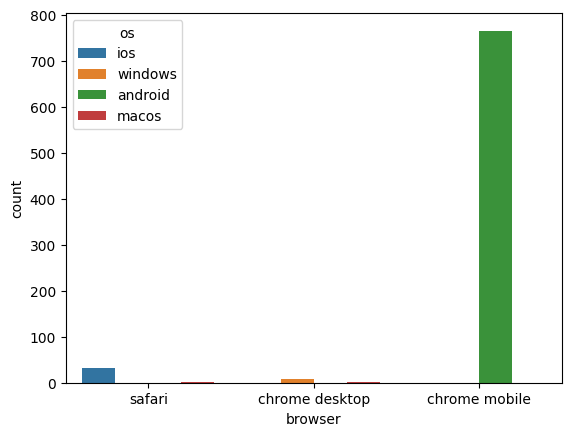

In [211]:
sns.countplot(data=random_h, x='browser', hue='os')

<Axes: xlabel='timestamp', ylabel='browserversion'>

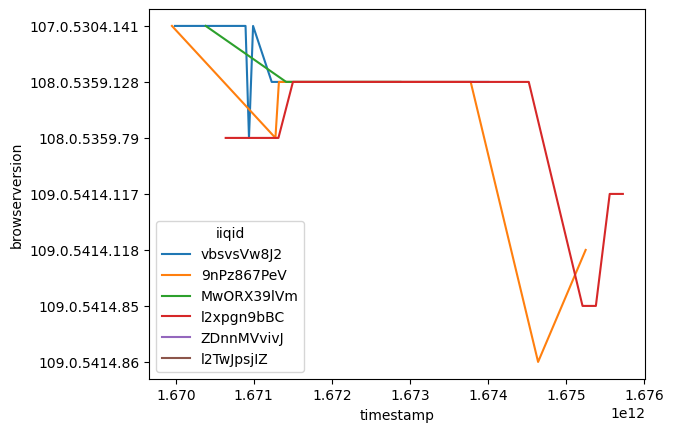

In [230]:
one_browser = random_h[random_h['browser']=='chrome mobile']

def is_rounded(version):
    return all(int(i) == 0 for i in version.split('.')[1:])

round_versions = one_browser[one_browser['browserversion'].apply(is_rounded)]
detailed_version = one_browser[~one_browser['browserversion'].apply(is_rounded)]

sns.lineplot(data=detailed_version.sort_values('browserversion'), x='timestamp', y='browserversion', hue='iiqid')

In [231]:
# browsers_version = 
detailed_version[['v1', 'v2', 'v3', 'v4']] = detailed_version['browserversion'].str.split('.', expand=True).to_numpy()

/var/folders/nw/8w_76z_n6fz418hmsps2_rq40000gn/T/ipykernel_49304/609253270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detailed_version[['v1', 'v2', 'v3', 'v4']] = detailed_version['browserversion'].str.split('.', expand=True).to_numpy()
/var/folders/nw/8w_76z_n6fz418hmsps2_rq40000gn/T/ipykernel_49304/609253270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detailed_version[['v1', 'v2', 'v3', 'v4']] = detailed_version['browserversion'].str.split('.', expand=True).to_numpy()
/var/folders/nw/8w_7

<Axes: xlabel='timestamp', ylabel='browserversion'>

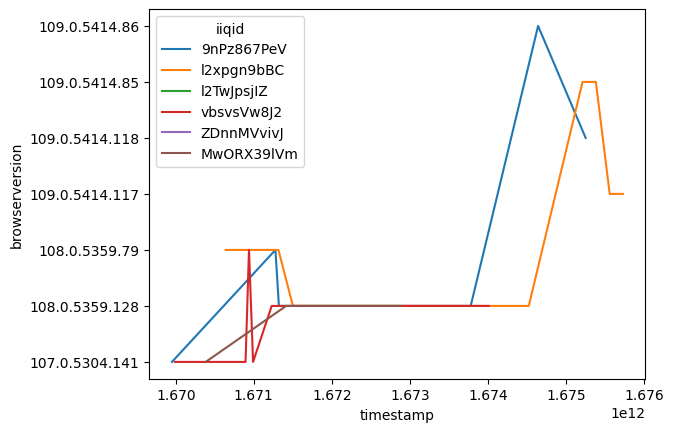

In [241]:
plot_order = detailed_version.sort_values(['v1','v2','v3','v4'], ascending=False)
sns.lineplot(data=plot_order, x='timestamp', y='browserversion', hue='iiqid')

In [142]:
sorted_by_version = random_h[(random_h['maid']==4) & (random_h['os']=='android')].sort_values('browserversions')
# g = sns.lineplot(data=sorted_by_version, x='timestamp', y=sorted_by_version.index, sort=False, hue='iiqid')
# g.set_yticklabels(labels=[str(v) for v in sorted_by_version['browserversions']]);
sorted_by_version.browserversions.unique()

array([(108, 0, 5359, 128), (109, 0, 5414, 85), (109, 0, 5414, 86),
       (109, 0, 5414, 117), (109, 0, 5414, 118)], dtype=object)

In [16]:
# create a new column for each user that contains the browser version
for i in user_ids:
    user_df = df[df['user_id'] == user_id]
    browser_versions = user_df['browser_version'].str.split(' ', expand=True)[1].str.split('.', expand=True)
    browser_versions = browser_versions.astype(int)
    for i in range(1, 4):
        zero_mask = browser_versions[i] == 0
        next_subversion = browser_versions[i][~zero_mask].shift(-1)
        browser_versions[i][zero_mask] = next_subversion[zero_mask]
    df.loc[df['user_id'] == user_id, ['major', 'minor', 'patch', 'subpatch']] = browser_versions.values

NameError: name 'user_ids' is not defined

In [17]:
# browser_versions = third_parties['browserversion'].str.split(' ', expand=True)[1].str.split('.', expand=True)
one_row = third_parties.iloc[0]

In [47]:
bv = [int(i) for i in one_row['browserversion'].split('.')]

In [63]:
# third_parties.drop('broswerversions', inplace=True)
# third_parties[third_parties['browserversion'].apply(lambda x: isinstance(x, float))]
# # third_parties

In [67]:
sns.lineplot(data=random_h[random_h['os']=='android'].sort_values('broswerversions'), x='timestamp', y='broswerversions', hue='iiqid')

KeyError: 'broswerversions'

In [245]:
type(third_parties.iloc[0])

pandas.core.series.Series

In [20]:
zero_mask = bv[i] == 0
next_subversion = bv[i][~zero_mask].shift(-1)
browser_versions[i][zero_mask] = next_subversion[zero_mask]

,timestamp,iiqid,hh_id,maid,partner_id,ip,iscellip,cellispid,domain,is_house_ip_or_source_ip,brand,model,os,osversion,browser,advertisedbrowser,browserversion,type,is_best_ip,time
422949,1672629481072,oG3ObsTuCY,000l1YGl4d,4,14,411766146,False,884881265,-438857959,False,lg,lm-g900,android,12,chrome mobile,Chromium,108.0.5359.128,smartphone,False,2023-01-02 03:18:01.072
422950,1672627726378,oG3ObsTuCY,000l1YGl4d,4,14,411766146,False,884881265,128770977,False,lg,lm-g900,android,12,chrome mobile,Chromium,108.0.5359.128,smartphone,False,2023-01-02 02:48:46.378
422951,1672592622540,oG3ObsTuCY,000l1YGl4d,4,14,411766146,False,884881265,42076556,False,lg,lm-g900,android,12,chrome mobile,Chromium,108.0.5359.128,smartphone,False,2023-01-01 17:03:42.540
422952,1672592223367,oG3ObsTuCY,000l1YGl4d,4,14,411766146,False,884881265,42076556,False,lg,lm-g900,android,12,chrome mobile,Chromium,108.0.5359.128,smartphone,False,2023-01-01 16:57:03.367
422953,1672592065590,oG3ObsTuCY,000l1YGl4d,4,14,411766146,False,884881265,42076556,False,lg,lm-g900,android,12,chrome mobile,Chromium,108.0.5359.128,smartphone,False,2023-01-01 16:54:25.590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,1670931859851,YoaGKjHIjG,000l1YGl4d,7,14,2390118241,False,195387531,720825214,False,google,chrome,windows,8.1,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-13 11:44:19.851
424120,1670676577987,YoaGKjHIjG,000l1YGl4d,7,15131,1168058174,False,195387531,1967261364,False,google,chrome,windows,8.1,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-10 12:49:37.987
424121,1670676577184,YoaGKjHIjG,000l1YGl4d,7,15119,1168058174,False,195387531,1967261364,False,google,chrome,windows,8.1,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-10 12:49:37.184
424122,1670676576041,YoaGKjHIjG,000l1YGl4d,7,14,1168058174,False,195387531,1967261364,False,google,chrome,windows,8.1,chrome desktop,Chrome,108.0.0.0,desktop,False,2022-12-10 12:49:36.041
